## **Linear Regression with Python Scikit Learn**
In this task we will predict the score of a student if he/she studies 9.25 hrs/day.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

In [2]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### **Visualization of Data**
In This part we will visualize our data to understand it easily.

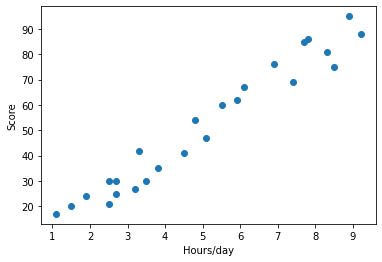

In [3]:
plt.scatter(data=df, x='Hours', y='Scores')
plt.xlabel('Hours/day')
plt.ylabel('Score')
plt.show()

The above graph shows the correlation is positive between ***Hours*** and ***Scores***

Let's confirm it by creating a correlation matrix.

In [4]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Spliting the data in ***Inputs(X)*** and ***outputs(y)***

In [5]:
# Inputs
X = df['Hours'].values.reshape(-1,1)

# Outputs
y = df['Scores'].values.reshape(-1,1)

### Creating ***Training*** and ***Test*** sets 

In [6]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, # Test size is 30% of the whole dataset
                                                    random_state=42)


### Creating a Regressor named ***'reg'*** and train it using ***fit***

In [7]:
# Create the regressor: reg_all
reg = LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train,y_train)

print('Model Trained')

Model Trained


### Predict values

In [8]:
y_pred = reg.predict(X_test)
y_test.shape

(5, 1)

In [9]:
#Comparing Actual with predicted
new_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})  
new_df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


### Now, Lets Answer our task question
What will be the score of the student that studies 9.25 hrs/day?

In [10]:
hours = np.array(9.25).reshape(-1,1)
predicted = reg.predict(hours)
print(f'''
No of Hours: {hours.flatten()[0]}
Marks predicted: {predicted.flatten()[0]}''')


No of Hours: 9.25
Marks predicted: 92.38611528261494


### Evaluate the Model

In [12]:
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.9678055545167994
Root Mean Squared Error: 4.352380006653288
